# Машинное обучение, ВМК МГУ

## Практическое задание 3. Метод опорных векторов и логистическая регрессия

### Общая информация

Дата выдачи: 9 ноября 2024 3:59

Мягкий дедлайн: 23:59 MSK 23 ноября 2024 (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: 23:59MSK 30 ноября 2024.

### О задании

В этом задании вы:
- настроите метод опорных векторов, визуализируете опорные вектора
- настроите логистическую регрессию
- познакомитесь с калибровочными кривыми и сравните вероятности, выдаваемые логистической регрессией и методом опорных векторов
- изучите методы работы с категориальными переменными
- в качестве бонуса попробуете библиотеку vowpal wabbit.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — **10 баллов + 5.7 бонусов**.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

<p style="color:#de3815;font-size:25px;">
Напоминание об оформлении и выполнении ноутбука
</p>

* Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть, не запуская ячейки (кроме редких случаев, когда необходимо намеренно скрыть ненужный output, про такие случаи желательно писать пояснения в тексте). **В противном случае -1 балл**
* При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. **Не нужно** удалять и видоизменять написанный код и текст, если явно не указана такая возможность. Создавать новые ячейки с кодом/текстов там, где это осмысленно и вы считаете необходимым, конечно, можно. **В противном случае -1 балл**
* В anytask обязательно нужно прикреплять отдельно файл с расширением ipynb (не в архиве, а именно отдельно). Если необходимо отправить еще какие-то файлы, то вынесите их в отдельный архив (если файлов много) и пришлите. **В противном случае -0.5 балла**
---
* Пишите, пожалуйста, выводы и ответы на вопросы в текстовых ячейках/при помощи print в коде/как результат вывода ячейки. При их отсутствии мы не можем понять, сделали ли вы задание и понимаете, что происходит, и **поэтому будем снижать баллы**
* Если алгоритм не сказано реализовывать явно, его всегда можно импортировать из библиотеки.
---
* Про графики. _Штрафы будут применяться к каждому результату команды отображения графика (plt.show() и др. аналогичные). Исключением являются графики, генерируемые функциями каких-либо сторонних библиотек, если их нельзя кастомизировать_

    * должно быть название (plt.title) графика; **В противном случае &ndash; -0.05 балла**
    * на графиках должны быть подписаны оси (plt.xlabel, plt.ylabel); **В противном случае &ndash; -0.025 балла за каждую ось**
    * должны быть подписаны единицы измерения (если это возможно); **В противном случае &ndash; -0.025 балла за каждую ось**
    * все названия должны быть понятны любому человеку, знакомому с терминологией, без заглядывания в код; **В противном случае &ndash; -0.05 балла**
    * подписи тиков на осях не должны сливаться как на одной оси, так и между ними; **В противном случае &ndash; -0.025 балла за каждую ось**
    * если изображено несколько сущностей на одном холсте (например несколько функций), то необходима поясняющая легенда (plt.legend); **В противном случае &ndash; -0.05 балла**
    * все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном); **В противном случае &ndash; -0.05 балла**
    * если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах);
    * графики должны быть не супер-микро и не супер-макро по размерам, так, чтобы можно было увидеть все, что нужно.
    * при необходимости улучшения наглядности графиков, можно пользоваться логарифмической шкалой по осям x/y.
    
### А также..

* Для удобства поиска вопросов, на которые от вас просят ответа, мы пометили их знаком **(?)**
* Знак **(!)** означает, что выполнение замечания необходимо для **возможности получения полного балла**
* Даем до +0.3 баллов за выдающиеся успехи по субъективному мнению проверяющих. Этот **бонус** не апеллируется

In [1]:
import time
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
from sklearn import inspection, datasets
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
from sklearn.metrics import accuracy_score, roc_auc_score, average_precision_score, roc_curve, precision_recall_curve
from sklearn.metrics import auc
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, TargetEncoder, MinMaxScaler
from sklearn.svm import LinearSVC, SVC



%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

# Метод опорных векторов (SVM)

#### Краткое изложение теории

Метод опорных векторов --- метод построения линейных классификаторов и регрессоров.

Пусть $\{(x_i, y_i)_{i=1}^l\}$ --- обучающая выборка. Исходная задача оптимизации ставится следующим образом:
$$
\sum \limits_{i=1}^l (1 - (\langle x_i, w \rangle - w_0)y_i)_+ + \frac{1}{2C}\|w\|^2 \to \min
$$

После перехода к двойственной задаче (выводилось на лекции К. В. Воронцова) получаем задачу оптимизации:
$$
\begin{cases}
g(\lambda) = \sum_{i=1}^l \lambda_i - \frac{1}{2} \sum_{i=1}^l \sum_{j=1}^l \lambda_i \lambda_j y_i y_j \langle x_i, x_j \rangle \to \underset{\lambda}{\max} \\
0 \le \lambda_i \le C \\
\sum_{i=1}^l \lambda_i y_i = 0
\end{cases}
$$

Пусть $\lambda$ --- решение двойственной задачи, $S$ --- множество индексов ненулевых координат $\lambda$. Тогда решением исходной задачи будет линейный классификатор:
$$
a(x) = sign \left( \sum_{i \in S} \lambda_i \langle x, x_i \rangle - w_0 \right)
$$

Признаками данного линейного классификатора будут $f_i(x) = \langle x, x_i\rangle, \, i \in S$.

Объекты $x_i, \, i \in S$ называются опорными, их нам необходимо хранить в памяти для вычисления признаков $f_i(x)$.

Вместо $\langle x, x_i \rangle$ можно использовать ядра $K(x, x_i)$. Ядра позволяют делать нелинейные преобразования признаков

В библиотеке sklearn реализованы: SVR (LinearSVR) --- SVM для задачи регрессии, SVC (LinearSVC) --- SVM для задачи классификации.

Версии Linear используют только линейное ядро $\langle x, x_i \rangle$. При использовании линейного ядра можно не переходить к двойственной задаче, поэтому в некоторых ситуациях LinearSVC учится быстрее чем SVC с kernel='linear'.

### Задание 1 **(1.1 баллов)**: Визуализация разделяющей кривой

В данном задании мы посмотрим на опорные векторы и разделяющие кривые, построенные SVC с различными ядрами

Для начала сгенерируем синтетический датасет

X.shape=(300, 2)	y.shape=(300,)


Text(0, 0.5, 'Feature 2')

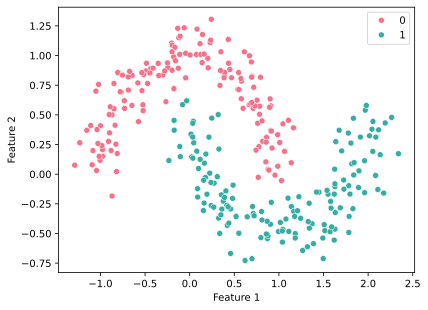

In [6]:
X, y = datasets.make_moons(
    n_samples=300,
    random_state=42,
    noise=0.125,
)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=50)

print(f"{X.shape=}\t{y.shape=}")

sns.scatterplot(
    x=X[:, 0],
    y=X[:, 1],
    hue=y,
    palette=sns.color_palette("husl", 2)
)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

### Обучение SVM

**Задание 1.1 (0.2 балла):** Обучите SVM с линейным ядром (SVC из sklearn с ядром linear). Подберите нелинейное ядро для SVM (список ядер есть в документации).

Посчитайте accuracy. Классификатор с правильно подобранным нелинейным ядром должен выдавать accuracy, близкую к 1.

In [7]:
# Linear kernel
linear_clf = SVC(kernel='linear')
linear_clf.fit(X_train, y_train)
y_pred_lin = linear_clf.predict(X_val)
print("Точность SVM с линйеным ядром:", accuracy_score(y_pred_lin, y_val))

# Polynomial kernel
poly_clf = SVC(kernel='rbf')
poly_clf.fit(X_train, y_train)
y_pred_pol = poly_clf.predict(X_val)
print("Точность SVM с ядром 'rbf' (radial basis function) ядром:", accuracy_score(y_pred_pol, y_val))

Точность SVM с линйеным ядром: 0.84
Точность SVM с ядром 'rbf' (radial basis function) ядром: 1.0


### Построение опорных векторов и разделяющей кривой

**Задание 1.2 (0.9 баллов):** Визуализируйте опорные векторы и разделяющую кривую для обученных выше классификаторов.

Индексы опорных векторов хранятся в поле $\texttt{support\_vectors\_}$. Графики должны быть оформлены правильно, в соответствии с теми требованиями, которые были в первой лабороторной. Так же опорные вектора следует рисовать не другим цветом, а другой меткой (например, крестик), иначе теряется принадлежность к классу. Точки из разных классов рисуйте разными цветами (или разными фигурами). Если необходимо, можно вводить альфа-канал (степень прозрачности) для улучшения восприятия. Для лучшего понимания метода, рисуйте не только разделяющую кривую, но из "разделяющую полосу" вокруг прямой.

(!) При реализации функции plot_svc_predictions запрещено использовать готовые функции отрисовки разделяющей прямой/кривой для моделей.

In [214]:
def plot_svc_predictions(model, data, y_data):
    '''
    Визуализация опорных векторов и разделяющей кривой

    Parameters:
        model: модель классификации
        data: классифицируемые данные
        y_data: метки

    '''
    support_indeces = model.support_
    plt.figure(figsize=(10, 8))
    sns.scatterplot(
        x=data[:, 0],
        y=data[:, 1],
        hue=y_data,
        palette=sns.color_palette("husl", 2),
        alpha=0.5, 
    )
    
    sns.scatterplot(
        x=data[support_indeces, 0],
        y=data[support_indeces, 1],
        hue=y_data[support_indeces],
        palette=sns.color_palette("husl", 2),
        marker='+',
        s=100,
        legend=False,
        linewidth=2,
    )

    x1_min, x1_max = data[:, 0].min() - 0.5, data[:, 0].max() + 0.5
    x2_min, x2_max = data[:, 1].min() - 0.5, data[:, 1].max() + 0.5
    x1_temp, x2_temp = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                         np.arange(x2_min, x2_max, 0.02))
    
    Z = model.decision_function(np.vstack((x1_temp.ravel(), x2_temp.ravel())).T)
    Z = Z.reshape(x1_temp.shape)
    
    plt.contour(x1_temp, x2_temp, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
    plt.contourf(x1_temp, x2_temp, Z, colors='k', levels=[-1, 0, 1], alpha=0.05)

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title("Опорные вектора (отмечены как +) и разделяющая кривая")
    plt.show()

Опорные вектора (отмечены как +) и разделяющая кривая для SVM с линейным ядром


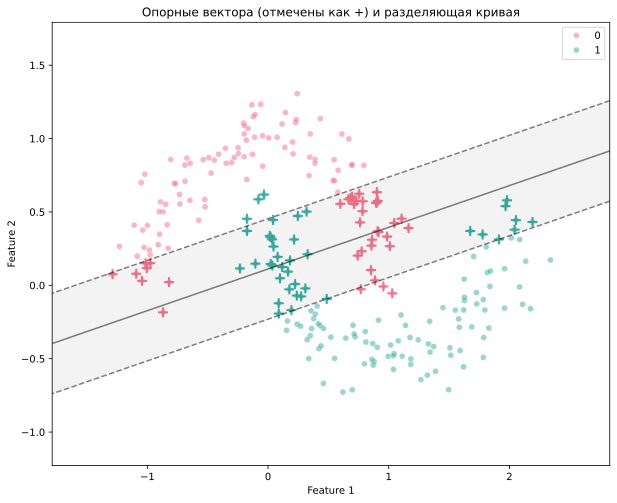

In [9]:
# your code here
print("Опорные вектора (отмечены как +) и разделяющая кривая для SVM с линейным ядром")
plot_svc_predictions(linear_clf, X_train, y_train)

Опорные вектора (отмечены как +) и разделяющая кривая для SVM с нелинейным ядром


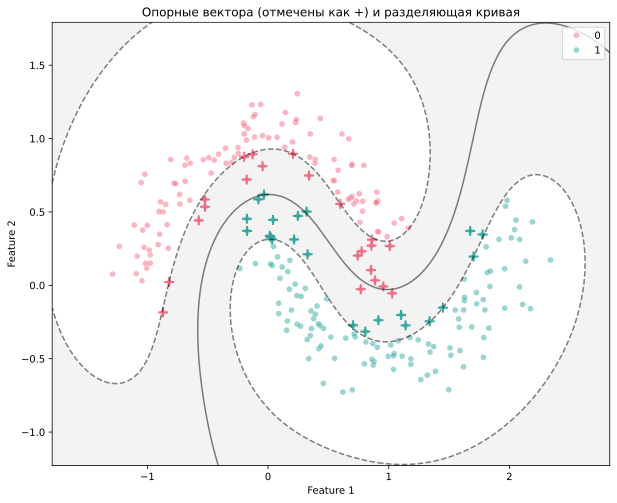

In [10]:
# your code here
print("Опорные вектора (отмечены как +) и разделяющая кривая для SVM с нелинейным ядром")
plot_svc_predictions(poly_clf, X_train, y_train)

### Визуализация спрямляющего пространства

Ядро $K(x, y)$ является скалярным произведением в некотором линейном пространстве $V$, существует отображение $\varphi: K(x, y) = \langle \varphi(x), \varphi(y) \rangle$. В $V$ полученный классификатор с ядром $K$ будет линейным, разделяющей поверхонстью будет гиперплоскость.

**(Бонус) Задание 1.3 (1 балл):** В данном задании нужно восстановить отображение $\varphi$ и построить разделяющую гиперплоскость.

Так как ядра являются скалярными произведениями в пространствах большей размерности, то для визуализации нужно построить новый одномерный датасет

Text(0.5, 1.0, 'Feature 1 PDF estimation')

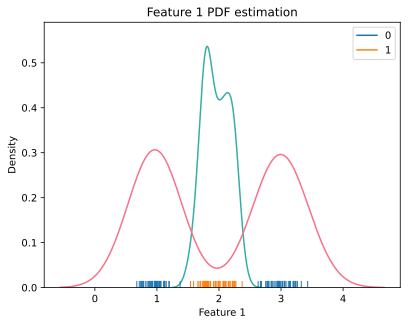

In [106]:
_, ax = plt.subplots()

X = np.hstack([
    np.random.normal(loc=1.0, scale=0.15, size=(50, )),
    np.random.normal(loc=2.0, scale=0.2, size=(50, )),
    np.random.normal(loc=3.0, scale=0.15, size=(50, )),
]).reshape((-1, 1))

y = np.hstack((
    np.zeros(50, dtype=int),
    np.ones(50, dtype=int),
    np.zeros(50, dtype=int),
))

sns.kdeplot(
    x=X.squeeze(),
    hue=y,
    ax=ax,
    palette=sns.color_palette("husl", 2),
)

sns.rugplot(x=X.squeeze(), hue=y)

ax.set_xlabel('Feature 1')
ax.set_title('Feature 1 PDF estimation')

Обучите SVC с полиномиальным ядром степени 2

In [246]:
X_train_pol, X_val_pol, y_train_pol, y_val_pol = train_test_split(X, y, test_size=25)
clf = SVC(kernel='poly', degree=2, coef0=1)
clf.fit(X_train_pol, y_train_pol)
y_pred = clf.predict(X_val_pol)
print("Точность SVM с полиномиальным ядром степени 2 (R = 1):", accuracy_score(y_pred, y_val_pol), '\n')


Точность SVM с полиномиальным ядром степени 2 (R = 1): 0.96 



На семинаре доказывалось, что полиномиальное ядро $(\langle x, y \rangle + R)^d$ является ядром.

(?) Найдите отображение $\varphi: K(x, y) = \langle \varphi(x), \varphi(y) \rangle$. Какая размерность получилась?

**ОТВЕТ ТУТ:**
В случае произвольной размерности вектора n:
$$K(x,y) = (\langle x, y \rangle + R) ^ 2 = (x_1y_1 + x_2y_2 + ... + x_ny_n  + R)^2 = x_1^2y_1^2 + x_2y_2^2 + ... + y_n^2y_n^2 + R^2 +
2x_1y_1x_2y_2 + 2x_1y_1x_3y_3 + ... + 2x_1y_1R + 2x_2y_2R + ... =$$
$$ = \sum_{i=1}^{n}x_i^2y_i^2 + \sum _{i=1}^{n} \sum_{j > i}^{n} 2 x_ix_jy_iy_j + \sum_{i=1}^{n} 2R x_iy_i + R^2$$
Тогда отображние $\varphi(x)$ будет содержать:
* $\{x_i^2\}, \ \text{где} \ i=1..n $ - будет содержать $n$ компонент
* $\{\sqrt2  x_ix_j\},\ \text{где} \ i,j = 1..n, j > i$ - будет содержать $\frac{n(n-1)}{2}$ компонент
* $\{\sqrt{2R}x_i\}, \ \text{где} \ i=1..n $ - будет содержать $n$ компонент
* $\{R\}$ - будет содержать 1 компоненту

Тогда итоговая размерность: $n + \frac{n(n-1)}{2} + n + 1 = \frac{2n + n^2 - n + 2n + 2}{2} = \frac{n^2+3n+2}{2}$

То есть $\varphi: \mathbb R ^ n \to \mathbb R^{\frac{n^2+3n+2}{2}}$

В нашем слечае $n = 1$,  тогда отображение $\varphi : (x) \to (x^2, \sqrt{2R}x, R)$, то есть пространство размером в 1 в пространство **размером 3**

Так же можно заметить, что третий признак будет у всех одинаковый (R), поэтому его можно не использовать, чтобы не перегржать модель

Постройте разделяющую кривую в $R^1$

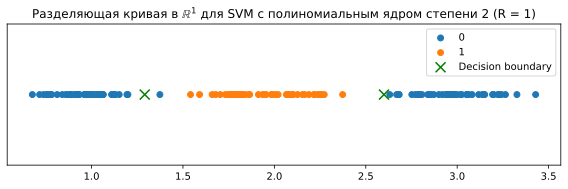

In [248]:
plt.figure(figsize=(8, 2.5))


plt.scatter(X[y == 0], np.zeros_like(X[y == 0]), label='0')
plt.scatter(X[y == 1], np.zeros_like(X[y == 1]), label='1')

x_min, x_max = X.min() - 0.5, X.max() + 0.5
x_temp = np.linspace(x_min, x_max, 10000).reshape(-1, 1)
y_pred = clf.predict(x_temp)

change = x_temp[:-1][y_pred[1:] != y_pred[:-1]]
plt.scatter(change, np.zeros_like(change), c='green', s=100, marker='x', label='Decision boundary')
plt.yticks([])
plt.legend()
plt.tight_layout()
plt.title(r'$\text{Разделяющая кривая в } \mathbb{R}^1 \text{ для SVM с полиномиальным ядром степени 2 (R = 1)}$')
plt.show()

Постройте разделяющую гиперплоскость в спрямляющем пространстве

* hint: plt.figure.add_subplot(projection='3d')

In [249]:
r = 1
def phi(x: float) -> np.array:
    '''
    Отображение в спрямляющее пространство

    Parameters:
        x(float): Вектор в исходном пространстве R^1

    Returns:
        Вектор в спрямляющем пространстве
    '''
    return np.array([x**2, np.sqrt(2*r) * x])

In [250]:
#your code here
X_new = np.array([phi(x[0]) for x in X])
X_train_pol, X_val_pol, y_train_pol, y_val_pol = train_test_split(X_new, y, test_size=50)
clf = SVC(kernel='linear')
clf.fit(X_train_pol, y_train_pol)
y_pred = clf.predict(X_val_pol)
print("Точность SVM с полиномиальным ядром степени 2 (R = 1):", accuracy_score(y_pred, y_val_pol), '\n')


Точность SVM с полиномиальным ядром степени 2 (R = 1): 0.98 



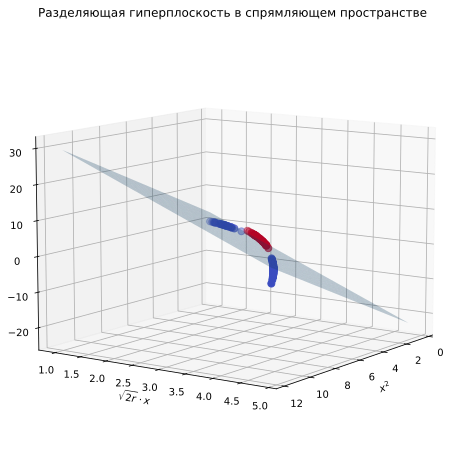

In [263]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(X_new[:, 0], X_new[:, 1], y,
                   c=y, cmap='coolwarm', s=50)
linear_svc = SVC(kernel='linear')
linear_svc.fit(X_new, y)

w = linear_svc.coef_[0]
b = linear_svc.intercept_[0]

x1_min, x1_max = X_new[:, 0].min(), X_new[:, 0].max()
x2_min, x2_max = X_new[:, 1].min(), X_new[:, 1].max()
x1_temp, x2_temp = np.meshgrid(np.linspace(x1_min, x1_max, 50),
                    np.linspace(x2_min, x2_max, 50))

Z = -(w[0]*x1_temp + w[1]*x2_temp + b)

ax.plot_surface(x1_temp, x2_temp, Z, alpha=0.3)

ax.set_xlabel('$x^2$')
ax.set_ylabel('$\sqrt{2r} \cdot x$')
ax.set_zlabel('Класс')
ax.set_title("Разделяющая гиперплоскость в спрямляющем пространстве")
ax.view_init(elev=10, azim=35)
plt.show()

(?) Можно ли найти сечение плоскостью, которое позволит лучше визуализировать разделение по классам? Если да - реализуйте.

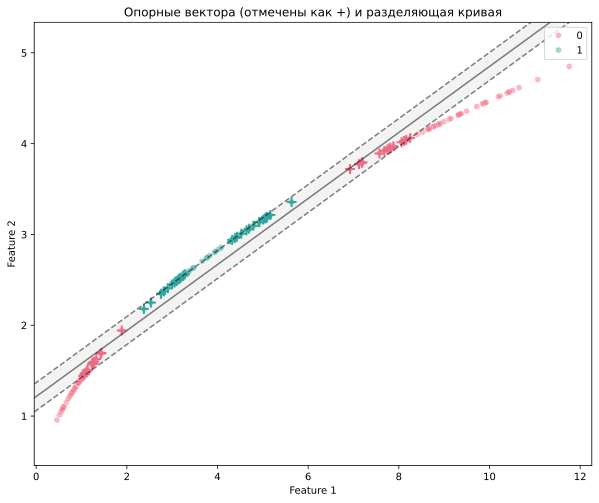

In [254]:
plot_svc_predictions(linear_svc, X_new, y)

# Логистическая регрессия

Пусть выборка $\{(x_i, y_i)_{i=1}^l\}$ пришла из совместного распределения $(X, Y)$. Так как случайная величина $Y$ может принимать только 2 значения, то случайные величины $Y$ и $Y \mid X$ являются Бернулевскими (с точностью до нормировки). Мы хотим научиться предсказывать $\mathbb{P} (Y = 1 \mid X)$ некоторой функцией $f(X)$.

Запишем задачу максимизации правдоподобия:
$$
\prod_{i=1}^N f(x_i)^{[y_i = +1]} (1 - f(x_i))^{[y_i = -1]} \to \max
$$

Положим $f(x) = \sigma(\langle x, w \rangle + w_0)$. Вид данной функции подробно объяснялся на лекции и на семинаре.

Преобразовав исходную задачу оптимизации получим задачу оптимизации для обучения Логистической регрессии.
$$
\sum_{i=1}^l \log \left(1 + \exp(-y_i (\langle x, w \rangle + w_0)) \right) \to \min
$$

Мы строим $f(x)$ как оценку вероятности принадлежности объекта положительному классу. Величина $s_i = \langle x_i, w \rangle + w_0$ называется логитом (logit). Для решения задачи классификации объекта $x_i$ нет необходимости вычислять $f(x_i) = \sigma(s_i)$, достаточно проверить условие $s_i > 0$.

# Решение задачи предсказания оттока клиентов из банка

Далее мы будем решать задачу классификации: необходимо предсказать уйдет ли клиент из банка.

Для решения задачи будем использовать как LogisticRegression, так и SVM.  

В помощь вам предоставляется функция test_pipeline, обучающая и тестирующая вашу модель. Изучите ее архитектуру

In [2]:
def test_pipeline(pipeline: Pipeline, data: pd.DataFrame, target, method: str = None, return_val_labels: bool = False, return_data_split: bool = False) -> np.ndarray:
    '''
    Обучение и валидация модели

    Parametrs:
        pipeline: score-based classifier
        data (pd.DataFrame): features
        target (pd.Series): target

    Returns:
        scores on validation dataset
    '''
    X_train, X_val, y_train, y_val = train_test_split(data, target, random_state=42, test_size=0.2)

    time_start = time.time()
    model = pipeline.fit(X_train, y_train)
    fit_time = time.time() - time_start

    scores = model.decision_function(X_val)

    acc = accuracy_score(y_val, scores > 0)
    roc_auc = roc_auc_score(y_val, scores)
    pr_auc = average_precision_score(y_val, scores)

    if method:
        print(f"Method: {method}", end='\t')
    print(f"{acc=:.3f} {roc_auc=:.3f}, {pr_auc=:.3f}, train_time={fit_time:.3f}s")

    if return_data_split:
        return scores, (X_train, X_val, y_train, y_val)
    elif return_val_labels:
        return scores, y_val
    else:
        return scores

**Задание 2.1 (0.75 баллов):** реализуйте функцию построения ROC и PR кривых для произвольного score-based классификатора. Функция должна выводить ROC-AUC и PR-AUC

* hint: sklearn.metrics.RocCurveDisplay, sklearn.metrics.PrecisionRecallDisplay

In [37]:
def build_curves(scores: np.ndarray, target: np.ndarray, method: str = None) -> None:
    '''
    Построение ROC и PR кривых
    '''
    # подсичтаем нужные данные для построения кривых
    #your code here
    roc_auc = roc_auc_score(target, scores)
    pr_auc = average_precision_score(target, scores)
    
    # напечатаем площади под граффиками
    #your code here
    print(f'ROC-AUC = {roc_auc}')
    print(f'PR-AUC = {pr_auc}')
    

    # построим граффики для соответсвтующих кривых
    #your code here
    RocCurveDisplay.from_predictions(target, scores, plot_chance_level=True, name=method)
    plt.grid()
    plt.title(f'ROC кривая для {method}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    PrecisionRecallDisplay.from_predictions(target, scores,  plot_chance_level=True, name=method)
    plt.grid()
    plt.title(f'PR кривая для {method}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.show()
    

**Задание 2.2 (0.3 балла):** Загрузка и предобработка датасета.

Загрузите датасет из файла ./train.csv

Целевой переменной будет являться Exited

(?)Какие признаки будут являться числовыми, какие категориальными? Что ещё можно посмотреть на данном этапе?

In [3]:
dts =  pd.read_csv('train.csv')
dts.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [25]:
print(f'Кол-во признаков (без id и Exited): {dts.shape[1] - 2}')
print(f'Кол-во объектов в обучающей выборке : {dts.shape[0]}')

temp = {}
for elem in dts.columns[1:-1]:
    temp[elem] = dts[elem].unique().size
    
temp = sorted(temp.items(), key=lambda item: item[1])
for elem in temp:
    print(elem[0], ' - ', elem[1])

Кол-во признаков (без id и Exited): 12
Кол-во объектов в обучающей выборке : 165034
Gender  -  2
HasCrCard  -  2
IsActiveMember  -  2
Geography  -  3
NumOfProducts  -  4
Tenure  -  11
Age  -  71
CreditScore  -  457
Surname  -  2797
CustomerId  -  23221
Balance  -  30075
EstimatedSalary  -  55298


In [4]:
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
categorical_features = ['CustomerId', 'Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
text_features = ['Surname']

**ОТВЕТ:**  
__Числовыми__ признаками будут (так как эти признаки не имеют ограничений по значению, то есть нет границ или категорий, в которые должны входить значения):
* CreditScore
* Age
* Tenure
* Balance
* NumOfProducts
* EstimatedSalary

__Категориальными__ признаками будут (так как значения ограничены рамками категории и их нелзя справнить на больше/меньше):
* CustomerId (нельзя сравнить как обычные числа)
* Geography (имеют огрниченный набор возможных значений)
* Gender (значения Male или Female)
* HasCrCard (значения 0 и 1, соответсвующие False и True) 
* IsActiveMember (значения 0 и 1, соответсвующие False и True)

И __текстовым__ признаком является признак Surname - фамилия (нельзя отнести ни к числомым, ни к категориальным признакам)

Так же про данные еще можно сказать, что всего 12 признаков (без id и Exited), всего в обучающей выборки 165034 объектов. Наиболбшее количество различных значений имеют признаки EstimatedSalary, Balance и CustomerId. Так же можно заметить, что признак Surname имеет всего 2797 имеет уникальных значений (при том, что CustomerId 23221 имеет уникальных значения - то есть 23221 клментов) - из этого можно сделать вывод, что признак Surname будет плох для обучения (так как разные клиенты могут иметь одинаковые фамилии - но это не как не определяет их жедание уйти или нет).

**Задание 2.3 (0.5 баллов):** Обучите LogisticRegression и LinearSVC только на числовых признаках. Не забудьте про StandardScaler

(?) Использование какого метода позволило добиться более выского качества? Почему? Как соотносится время обучения данных методов? Почему оно соотносится именно так?

In [27]:
column_transformer = ColumnTransformer([
    ('scaler', StandardScaler(), numerical_features)
])

pipeline = Pipeline(steps=[
    ('scaler', column_transformer),
    ('regression', LogisticRegression())
])

score_logreg = test_pipeline(pipeline=pipeline, data=dts[numerical_features], target=dts['Exited'], method='LogReg', 
                             return_data_split=True, return_val_labels=False)


pipeline = Pipeline(steps=[
    ('scaler', column_transformer),
    ('svc', LinearSVC(dual=False))
])

score_svc = test_pipeline(pipeline=pipeline, data=dts[numerical_features], target=dts['Exited'], method='SVC', 
                             return_data_split=True, return_val_labels=False)

Method: LogReg	acc=0.801 roc_auc=0.773, pr_auc=0.460, train_time=0.096s
Method: SVC	acc=0.795 roc_auc=0.775, pr_auc=0.457, train_time=0.069s


**ОТВЕТ:**
* **Качество**: точности предсказаний очень близки (0.801 у LogReg и 0.795 у SVC), так как обе модели являеются линейными классификаторами. Немного больше точность у LogReg, это может быть связано с тем, что метод нарямую оптимизирует вероятности принадлежности к классу (особенно на граничных значениях принятия решения) и метод менее чувствителен к выборсам
* **Время работы**: LogReg (0.096 секунд) работает медленне, чем SVC (0.069 секунд). Это происходит по тому, что LogReg - итеративный метод, где на каждой итерации происходит проход по всем данным. В SVC (решается задача квадртаичной оптимаизации) используется опорные вектора, при этом на каждой итерации просиходит оптимизация на паре опорных векторов (остальные фиксированы), так же остановка метода может произойти не только при достижении заданной точности или достижения максимального числа итераций, но и при выполении условий KKT
* **roc_auc** примерно одинаковы
* **pr_auc** примерно одинаковы
* Так же большая разница между roc_auc и pr_auc говорит о несбалансированности классов

Постройте ROC и PR кривые для обученных выше классификаторов. Для построения необходимо использовать реализованную ранее функцию build_curves

ROC-AUC = 0.77338638544401
PR-AUC = 0.4598346306979567


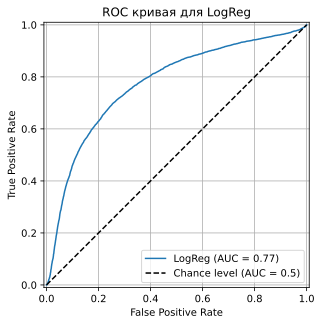

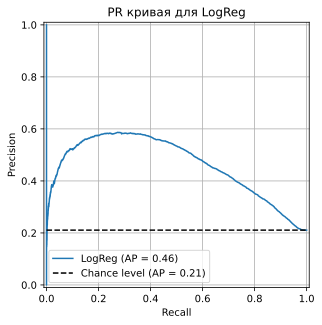

In [38]:
#your code here
logreg_prob = 1 / (1 + np.exp(-score_logreg[0]))
build_curves(logreg_prob, score_logreg[1][3], 'LogReg')

ROC-AUC = 0.7745893436817125
PR-AUC = 0.45725732904092936


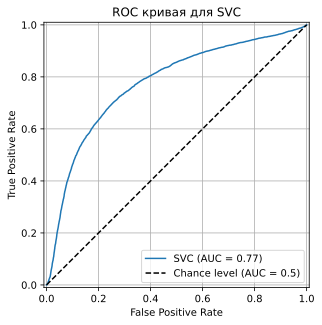

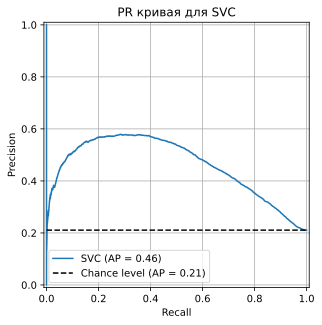

In [39]:
build_curves(score_svc[0], score_svc[1][3], 'SVC')

# Предобработка признаков

Как было изучено на семинаре, обученная на нормализованной выборке линейная модель оказывается интерпретируемой. За  вклад каждого признака в предсказание отвечает модуль весов.

**Задание 3.0 (0.95 баллов):** Объясните почему для интерпретируемости необходимо применять StandardScaler. Реализуйте функцию $\texttt{plot\_weights}$, которая будет отрисовывать значения весов в виде столбцовой диаграммы. Постройте ее.

Также бывает полезно посмотреть на корреляцию признаков друг с другом. Постройте корреляционную матрицу признаков.

(?) сделайте выводы

In [43]:
dts[numerical_features].mean()

CreditScore           656.454373
Age                    38.125888
Tenure                  5.020353
Balance             55478.086689
NumOfProducts           1.554455
EstimatedSalary    112574.822734
dtype: float64

**ОТВЕТ**: признаки имею разные масштабы, поэтому разные признаки будут вносить разный вклад в результат (чем больше признак, тем сильнее он влияет на результат, некоторые признаки могут иметь незначительный вклад). Мы хотим, чтобы все признаки вносили одинаковый вклад в ответ - поэтому необходимо их нормализовать (привести к одинаковому масштабу) при помощи StandardScaler

Method: SVC	acc=0.795 roc_auc=0.775, pr_auc=0.457, train_time=0.050s


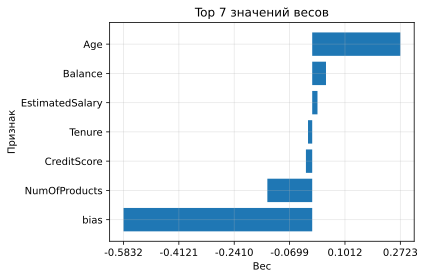

In [57]:
def plot_weights(weights, intercept, features, top_k=20):
    '''
    рисует значения весов линейной модели при признаках

    top_k: рисовать первые top_k весов по модулю
    '''
    w = pd.DataFrame({
        'feature': features,
        'weight': weights
    })
    w = pd.concat([
        w,
        pd.DataFrame({'feature': ['bias'], 'weight': [intercept]})
    ])

    w = w.nlargest(top_k, 'weight')
    w = w.sort_values('weight')
    
    plt.figure(figsize=(6, 4))
    plt.barh(w['feature'], w['weight'])
    
    plt.title(f'Top {top_k} значений весов')
    plt.xlabel('Вес')
    plt.ylabel('Признак')
    ticks_for_x = np.linspace(w["weight"].min(), w["weight"].max(), 6)
    plt.xticks(ticks_for_x, [f'{x:.4f}' for x in ticks_for_x])

    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# воспользуемся интерпретабельностью модели
column_transformer = ColumnTransformer([
    ('scaler', StandardScaler(), numerical_features)
])

pipeline = Pipeline(steps=[
    ('scaler', column_transformer),
    ('svc', LinearSVC(dual=False))
])
score_svc = test_pipeline(pipeline=pipeline, data=dts[numerical_features], target=dts['Exited'], method='SVC', 
                             return_data_split=True, return_val_labels=False)

svc = pipeline.named_steps['svc']
weights = svc.coef_[0]
intercept = svc.intercept_[0]

plot_weights(weights, intercept, features=numerical_features, top_k=len(numerical_features ) + 1)

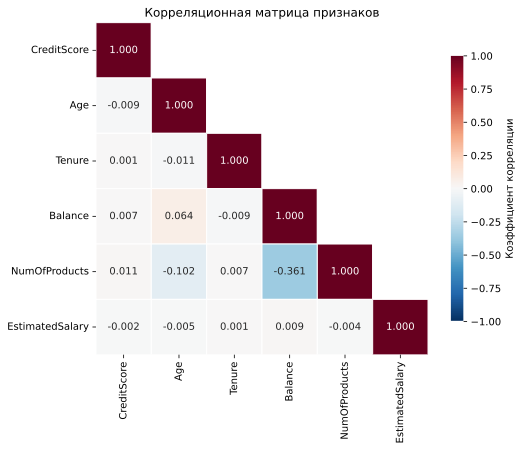

In [51]:
correlations = dts[numerical_features].corr()
# используйте diverging colormaps для corr-heatmaps
plt.figure(figsize=(8, 6))
sns.heatmap(correlations,
            annot=True,
            mask = np.triu(np.ones_like(correlations), k=1),
            fmt='.3f',
            cmap='RdBu_r',
            vmin=-1, 
            vmax=1,
            center=0,
            square=True,
            linewidths=1,
            cbar_kws={'shrink': .8, 'label': 'Коэффициент корреляции'})
plt.title('Корреляционная матрица признаков')
plt.show()

**ОТВЕТ**: можно сделать следующие выводы:
* Самая сильная корреляция у признаков NumOfProducts и Balance (-0.361) - чем больше продуктов у клиента банка, тем меньше его средний баланс на каждом продукте
* Небольшая корреляция есть у признаков Balance с Age (0.064) - чем больше возраст, тем больше баланс, и у NumOfProducts с Age (-0.102) - чем больше возраст, тем меньше продуктов у клиента
* В остальном корреляции между признаками очень маленькие, что говорит о том, что признаки независимы 

### Обработка категориальных признаков

В этой части мы научимся обрабатывать категориальные переменные. Очевидно что просто закодировать их в виде чисел - плохое решение, так как это задаёт некоторый порядок, которого на категориальных переменных может и не быть. Существует два основных способа обработки категориальных значений:
- One-hot-кодирование
- Счётчики (CTR, mean-target кодирование, ...) — каждый категориальный признак заменяется на среднее значение целевой переменной по всем объектам, имеющим одинаковое значение в этом признаке.

Начнём с one-hot-кодирования. Допустим наш категориальный признак $f_j(x)$ принимает значения из множества $C=\{c_1, \dots, c_m\}$. Заменим его на $m$ бинарных признаков $b_1(x), \dots, b_m(x)$, каждый из которых является индикатором одного из возможных категориальных значений:
$$
b_i(x) = [f_j(x) = c_i]
$$

**Задание 3.1 (0.9 баллов):** Закодируйте категориальные признаки при помощи OneHotEncoder'a, обучите LogisticRegression и LinearSVC

(?) Удалось ли достичь улучшения качества предсказаний? Сколько новых признаков появилось? Какие ещё выводы можно сделать?

In [98]:
#your code here
print("Качество БЕЗ OneHotEncoder\n")
column_transformer = ColumnTransformer([
    ('scaling', StandardScaler(), numerical_features)
])
pipeline = Pipeline(steps=[
    ('scal', column_transformer),
    ('regression', LogisticRegression())
])

score_logreg = test_pipeline(pipeline=pipeline, data=dts[numerical_features+categorical_features], target=dts['Exited'], method='LogReg', 
                             return_data_split=True, return_val_labels=False)


pipeline = Pipeline(steps=[
    ('ohe_scal', column_transformer),
    ('svc', LinearSVC(dual=False))
])

score_svc = test_pipeline(pipeline=pipeline, data=dts[numerical_features+categorical_features], target=dts['Exited'], method='SVC', 
                             return_data_split=True, return_val_labels=False)
print(f'\nРазмерность {len(numerical_features) + len(categorical_features)}')

Качество БЕЗ OneHotEncoder

Method: LogReg	acc=0.801 roc_auc=0.773, pr_auc=0.460, train_time=0.048s
Method: SVC	acc=0.795 roc_auc=0.775, pr_auc=0.457, train_time=0.052s

Размерность 11


In [97]:
#your code here
print("Качество С OneHotEncoder\n")
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ('scaling', StandardScaler(), numerical_features)
])
pipeline = Pipeline(steps=[
    ('ohe_scal', column_transformer),
    ('regression', LogisticRegression())
])

score_logreg = test_pipeline(pipeline=pipeline, data=dts[numerical_features+categorical_features], target=dts['Exited'], method='LogReg', 
                             return_data_split=True, return_val_labels=False)


pipeline = Pipeline(steps=[
    ('ohe_scal', column_transformer),
    ('svc', LinearSVC(dual=False))
])

score_svc = test_pipeline(pipeline=pipeline, data=dts[numerical_features+categorical_features], target=dts['Exited'], method='SVC', 
                             return_data_split=True, return_val_labels=False)

print(f'\nРазмерность {column_transformer.fit_transform(dts[numerical_features+categorical_features]).shape[1]}')

Качество С OneHotEncoder

Method: LogReg	acc=0.830 roc_auc=0.808, pr_auc=0.573, train_time=0.574s
Method: SVC	acc=0.818 roc_auc=0.784, pr_auc=0.524, train_time=0.600s

Размерность 23236


**ОТВЕТ**:
1) **КАЧЕСТВО**. С использованием OneHotEncoder точность предсказаний увеличилась как для LogReg (было 0.801 - стало 0.830), так и для SVC (было 0.795 - стало 0.818). ROC-AUC так увеличился (для LogReg было 0.773 - стало 0.808; для SVC было 0.775 - стало 0.784). PR-AUC тоже увеличился (для LogReg было 0.460 - стало 0.573; для SVC было 0.457 - стало 0.524)

2) **РАЗМЕРНОСТЬ ПРИЗНАКОГО ПРОСТРАНСТВА**. Рарзмерность сильно увеличилась - примерно 2112 раз (было 11 стало 23236).

3) **ВРЕМЯ ВЫПОЛНЕНИЯ**. Время выполения увеличилось примерно 9.7 раз (для LogReg было 0.046 секунд - стало 0.574 секунд; для SVC было 0.052 секунды - стало 0.600 секунд). Это происходит потому, что размерность признакового пространства сильно увеличилась.

4) **СРАВНЕНИЕ МОДЕЛЕЙ**. Как было сказано выше в экспериментах LogReg показывает лучше качество, чем SVC. Но время работы у LogReg стало меньше, чем у SVC (хотя в предыдущих экспериментах было обратное) - это может быть связано с тем, что у SVC появилось больше опорных векотров (по которым идет оптимизация) и требуется больше времени, чем для оптимизации по всем данным (как у LogReg).

Как можно было заменить, one-hot-кодирование может сильно увеличивать количество признаков в датасете, что сказывается на памяти, особенно, если некоторый признак имеет большое количество значений. Эту проблему решает другой способ кодирование категориальных признаков — счётчики. Основная идея в том, что нам важны не сами категории, а значения целевой переменной, которые имеют объекты этой категории. Каждый категориальный признак мы заменим средним значением целевой переменной по всем объектам этой же категории:
$$
g_j(x, X) = \frac{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)][y_i = +1]}{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)]}
$$

Отметим, что такие признаки сами по себе являются классификаторами и, обучаясь на них, мы допускаем "утечку" целевой переменной в признаки. Это ведёт к переобучению, поэтому считать такие признаки необходимо таким образом, чтобы при вычислении для конкретного объекта его целевая метка не использовалась. Это можно делать следующими способами:
1. Вычислять значение счётчика по всем объектам расположенным выше в датасете (например, если у нас выборка отсортирована по времени).
2. Вычислять по фолдам, то есть делить выборку на некоторое количество частей и подсчитывать значение признаков по всем фолдам кроме текущего (как делается в кросс-валидации).
3. Вычислять значение счётчика по всем объектам кроме того, для которого вычисляется значение счётчика (leave one out encoding)
4. Внесение некоторого шума в посчитанные признаки.

В данном разделе предлагается реализовать счётчики самым простым способом — внесением некоторого шума к посчитанным значениям (необходимо соблюсти баланс между избавление от переобучения и полезностью признаков).

**Задание 3.2 (1 балл):** Закодируйте категориальные признаки при помощи MeanTargetEncoder'a (предварительно его реализовав), обучите LogisticRegression и LinearSVC

(?) Удалось ли достичь улучшения качества предсказаний? Какие ещё выводы можно сделать?

In [5]:
from collections import defaultdict

class MeanTargetEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, rand_coef = 0.2):
        self.rand_coef = rand_coef

    def get_feature_names_out(self, input_features):
        return input_features

    def fit(self, X, y):
        #your code here
        X = np.array(X)
        y = np.array(y)
        self.encodings = defaultdict(dict)
        for col in range(X.shape[1]):
            unique_vals, indices = np.unique(X[:, col], return_inverse=True)
            for i, val in enumerate(unique_vals):
                mean_val = np.mean(y[indices == i])
                noise = np.random.normal(0, self.rand_coef)
                self.encodings[col][val] = mean_val + noise
        return self
        
    def transform(self, X):
        #your code here
        X = np.array(X)
        ans = np.zeros_like(X, dtype=float)
        for col in range(X.shape[1]):
            def_val = np.mean(list(self.encodings[col].values()))
            for i in range(X.shape[0]):
                val = X[i, col]
                ans[i, col] = self.encodings[col].get(val, def_val)
        return ans

In [148]:
#your code here
print("Качество С MeanTargetEncoder\n")
column_transformer = ColumnTransformer([
    ('mean_target', MeanTargetEncoder(rand_coef=0.7), categorical_features),
    ('scaling', StandardScaler(), numerical_features)
])
pipeline = Pipeline(steps=[
    ('mean_scal', column_transformer),
    ('regression', LogisticRegression())
])

score_logreg = test_pipeline(pipeline=pipeline, data=dts[numerical_features+categorical_features], target=dts['Exited'], method='LogReg', 
                             return_data_split=True, return_val_labels=False)


pipeline = Pipeline(steps=[
    ('mean_scal', column_transformer),
    ('svc', LinearSVC(dual=False))
])

score_svc = test_pipeline(pipeline=pipeline, data=dts[numerical_features+categorical_features], target=dts['Exited'], method='SVC', 
                             return_data_split=True, return_val_labels=False)

print(f'\nРазмерность {column_transformer.fit_transform(dts[numerical_features+categorical_features], dts["Exited"]).shape[1]}')

Качество С MeanTargetEncoder

Method: LogReg	acc=0.833 roc_auc=0.814, pr_auc=0.582, train_time=1.073s
Method: SVC	acc=0.827 roc_auc=0.811, pr_auc=0.560, train_time=1.249s

Размерность 11


**ОТВЕТ**:
1) **КАЧЕСТВО**. Качетсве может немного колебаться из-за того, что мы создаем шум случайным образом, так же влияет параметр rand_coef (при 0.7 лучший результат, так как при меньших значениях будет малый шум и переобучении, при больших - слишом сильный шум). В цулом качество почти такое же, как при OneHotEncoder (иногда показывает немного лучшее качество); точность, roc_auc и pr_auc отличаются в несколько тысячных при у OneHotEncoder и MeanTargetEncoder.

2) **РАЗМЕРНОСТЬ ПРИЗНАКОГО ПРОСТРАНСТВА**. Рарзмерность отсалась такой же, как у исходных данных - 11

3) **ВРЕМЯ ВЫПОЛНЕНИЯ**. Время выполнения увеличилось почти в 2 раза (примерно до 1.1 секунды) - это связано с тем, что с более сложной предобработкой данных - вычисление средних значений, создание шума, сопоставление полученных данных в transform с созданным словарем (в методе fit), а в OneHotEncoder только создается бинарные признаки 

4) **СРАВНЕНИЕ МОДЕЛЕЙ**. Как и с OneHotEncoder LogReg показывает лучше качество, чем SVC, а время работы у LogReg меньше, чем у SVC
5) Итого, для уменьшения памяти следует использовать MeanTargetEncoder, так же при работе с большим объемом данных следует использовть MeanTargetEncoder, так как обучение на меньшем количестве признаков займет меньше времени (а предобработка признаков будет происходиь лишь раз и это время будет незначительным в рамках всего времени обучения)

**(Бонус) Задание 3.3 (1 балл):** Посчитайте корректные счётчики, основываясь на объектах расположеных выше в датасете (не забудьте добавить и шум).

(?) Проанализируйте результат, сделайте выводы.

А теперь ответьте на следующий вопрос: что будет, если некоторая категория встречается в выборке всего несколько раз? По этой причине производится сглаживание счётчиков. Например, на практике хорошие результаты показывает использование сглаживания средним по всей выборке:
$$
g_j(x, X) = \frac{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)][y_i = +1] + C \times global\_mean}{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)] + C}
$$
где $global\_mean$ — среднее значение целевой переменной по всей выборке, $C$ — параметр, определяющий степень сглаживания (например, можно использовать 10 или подобрать для каждого признака свой). Основная идея в том, что мы "разбавляем" среднее значение по некоторой категории глобальным средним значении. И тем меньше, чем большее количество объектов этой категории встречается в выборке.

Однако для сглаживания вместо среднего значения целевой переменной можно использовать любое другое значение от 0 до 1 (этот параметр иногда называют $prior$). Можно сделать несколько признаков с разными значениями параметра. На практике в задачах бинарной классификации полезными бывают даже отрицательные значения!

**(Бонус) Задание 3.4 (1 балл)** Реализуйте счетчики со сглаживанием, как описано выше

(?) Проанализируйте результат, сделайте выводы.

In [ ]:
# CODE HERE

# Выбор ядра для SVM

В предыдущих заданиях мы использовали LinearSVC.

Как показала "toy" задача 1, использование нелинейных ядер позволяет добиться существенного прироста качества.

**Задание 4.1 (1 балл):** Подберите kernel и гиперпараметры ядра для SVC. Сравните с LogisticRegression.

(?) Как изменилось качество? Какие ещё выводы можно сделать?

In [39]:
#your code here
column_transformer = ColumnTransformer([
    ('mean_target', MeanTargetEncoder(rand_coef=0.7), categorical_features),
    ('scaling', StandardScaler(), numerical_features)
])
kernels = ['linear', 'rbf', 'poly', 'sigmoid']

param = {
    'linear': {
        'C': [0.1, 1, 10]
    },
    'rbf': {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto', 0.1, 1]
    },
    'poly': {
        'C': [0.1, 1],
        'degree': [2, 3],
        'gamma': ['scale', 'auto'],
        'coef0': [0, 1, 2]
    },
    'sigmoid': {
        'C': [0.1, 1],
        'gamma': ['scale', 'auto'],
        'coef0': [0, 1, 2]
    }
}

In [17]:
print("ЯДРО - linear")
for c in param['linear']['C']:
    pipeline = Pipeline(steps=[
        ('mean_scal', column_transformer),
        ('svc', SVC(kernel='linear', C=c))
    ])
    print(f'C = {c}', end=' ')
    score = test_pipeline(pipeline=pipeline, data=dts[numerical_features+categorical_features], target=dts['Exited'], method='SVC linear', 
                             return_data_split=False, return_val_labels=False)

ЯДРО - linear
C = 0.1 Method: SVC linear	acc=0.831 roc_auc=0.809, pr_auc=0.580, train_time=72.595s
C = 1 Method: SVC linear	acc=0.825 roc_auc=0.809, pr_auc=0.562, train_time=142.080s
C = 10 Method: SVC linear	acc=0.831 roc_auc=0.811, pr_auc=0.577, train_time=710.553s


In [9]:
print("ЯДРО - rbf")
for c in param['rbf']['C']:
    for gamma in param['rbf']['gamma']:
        pipeline = Pipeline(steps=[
            ('mean_scal', column_transformer),
            ('svc', SVC(kernel='rbf', C=c, gamma=gamma))
        ])
        print(f'C = {c} gamma = {gamma}', end=' ')
        score = test_pipeline(pipeline=pipeline, data=dts[numerical_features+categorical_features], target=dts['Exited'], method='SVC rbf', 
                                 return_data_split=False, return_val_labels=False)

ЯДРО - rbf
C = 0.1 gamma = scale Method: SVC rbf	acc=0.858 roc_auc=0.837, pr_auc=0.676, train_time=88.633s
C = 0.1 gamma = auto Method: SVC rbf	acc=0.860 roc_auc=0.830, pr_auc=0.689, train_time=87.424s
C = 0.1 gamma = 0.1 Method: SVC rbf	acc=0.860 roc_auc=0.842, pr_auc=0.686, train_time=85.777s
C = 0.1 gamma = 1 Method: SVC rbf	acc=0.848 roc_auc=0.821, pr_auc=0.662, train_time=198.689s
C = 1 gamma = scale Method: SVC rbf	acc=0.852 roc_auc=0.811, pr_auc=0.645, train_time=132.331s
C = 1 gamma = auto Method: SVC rbf	acc=0.862 roc_auc=0.827, pr_auc=0.685, train_time=107.410s
C = 1 gamma = 0.1 Method: SVC rbf	acc=0.856 roc_auc=0.829, pr_auc=0.664, train_time=103.665s
C = 1 gamma = 1 Method: SVC rbf	acc=0.857 roc_auc=0.817, pr_auc=0.655, train_time=342.805s
C = 10 gamma = scale Method: SVC rbf	acc=0.862 roc_auc=0.816, pr_auc=0.681, train_time=386.704s
C = 10 gamma = auto Method: SVC rbf	acc=0.861 roc_auc=0.810, pr_auc=0.680, train_time=373.517s
C = 10 gamma = 0.1 Method: SVC rbf	acc=0.862 ro

In [7]:
print("ЯДРО - poly")
for c in param['poly']['C']:
    for gamma in param['poly']['gamma']:
        for degree in param['poly']['degree']:
            for coef0 in param['poly']['coef0']:
                pipeline = Pipeline(steps=[
                    ('mean_scal', column_transformer),
                    ('svc', SVC(kernel='poly', C=c, gamma=gamma, degree=degree, coef0=coef0))
                ])
                print(f'C={c} gamma={gamma} degree={degree} coef0={coef0}', end=' ')
                score = test_pipeline(pipeline=pipeline, data=dts[numerical_features+categorical_features], target=dts['Exited'], method='SVC poly', 
                                         return_data_split=False, return_val_labels=False)

ЯДРО - poly
C=0.1 gamma=scale degree=2 coef0=0 Method: SVC poly	acc=0.857 roc_auc=0.851, pr_auc=0.684, train_time=65.345s
C=0.1 gamma=scale degree=2 coef0=1 Method: SVC poly	acc=0.858 roc_auc=0.851, pr_auc=0.679, train_time=65.718s
C=0.1 gamma=scale degree=2 coef0=2 Method: SVC poly	acc=0.857 roc_auc=0.857, pr_auc=0.670, train_time=69.090s
C=0.1 gamma=scale degree=3 coef0=0 Method: SVC poly	acc=0.849 roc_auc=0.831, pr_auc=0.656, train_time=71.615s
C=0.1 gamma=scale degree=3 coef0=1 Method: SVC poly	acc=0.856 roc_auc=0.848, pr_auc=0.685, train_time=76.136s
C=0.1 gamma=scale degree=3 coef0=2 Method: SVC poly	acc=0.860 roc_auc=0.844, pr_auc=0.691, train_time=91.413s
C=0.1 gamma=auto degree=2 coef0=0 Method: SVC poly	acc=0.851 roc_auc=0.853, pr_auc=0.670, train_time=65.656s
C=0.1 gamma=auto degree=2 coef0=1 Method: SVC poly	acc=0.852 roc_auc=0.840, pr_auc=0.663, train_time=69.561s
C=0.1 gamma=auto degree=2 coef0=2 Method: SVC poly	acc=0.852 roc_auc=0.851, pr_auc=0.668, train_time=66.714s
C

In [8]:
print("ЯДРО - sigmoid")
for c in param['sigmoid']['C']:
    for gamma in param['sigmoid']['gamma']:
        for coef0 in param['sigmoid']['coef0']:
            pipeline = Pipeline(steps=[
                ('mean_scal', column_transformer),
                ('svc', SVC(kernel='sigmoid', C=c, gamma=gamma, coef0=coef0))
            ])
            print(f'C={c} gamma={gamma} coef0={coef0}', end=' ')
            score = test_pipeline(pipeline=pipeline, data=dts[numerical_features+categorical_features], target=dts['Exited'], method='SVC sigmoid', 
                                     return_data_split=False, return_val_labels=False)

ЯДРО - sigmoid
C=0.1 gamma=scale coef0=0 Method: SVC sigmoid	acc=0.721 roc_auc=0.632, pr_auc=0.301, train_time=430.446s
C=0.1 gamma=scale coef0=1 Method: SVC sigmoid	acc=0.717 roc_auc=0.619, pr_auc=0.330, train_time=229.716s
C=0.1 gamma=scale coef0=2 Method: SVC sigmoid	acc=0.681 roc_auc=0.629, pr_auc=0.262, train_time=327.050s
C=0.1 gamma=auto coef0=0 Method: SVC sigmoid	acc=0.725 roc_auc=0.608, pr_auc=0.289, train_time=324.275s
C=0.1 gamma=auto coef0=1 Method: SVC sigmoid	acc=0.717 roc_auc=0.647, pr_auc=0.342, train_time=324.159s
C=0.1 gamma=auto coef0=2 Method: SVC sigmoid	acc=0.721 roc_auc=0.625, pr_auc=0.313, train_time=244.058s
C=1 gamma=scale coef0=0 Method: SVC sigmoid	acc=0.697 roc_auc=0.657, pr_auc=0.284, train_time=172.396s
C=1 gamma=scale coef0=1 Method: SVC sigmoid	acc=0.707 roc_auc=0.632, pr_auc=0.295, train_time=240.856s
C=1 gamma=scale coef0=2 Method: SVC sigmoid	acc=0.703 roc_auc=0.607, pr_auc=0.276, train_time=213.933s
C=1 gamma=auto coef0=0 Method: SVC sigmoid	acc=0.

In [17]:
param_lr = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear', 'saga'],
    'class_weight': [None, 'balanced']
}
for c in param_lr['C']:
    for penalty in param_lr['penalty']:
        for solver in param_lr['solver']:
            for class_weight in param_lr['class_weight']:
                pipeline = Pipeline(steps=[
                    ('mean_scal', column_transformer),
                    ('svc', LogisticRegression(C=c, penalty=penalty, class_weight=class_weight, solver=solver))
                ])
                print(f'C={c} penalty={penalty} solver={solver} class_weight={class_weight}', end=' ')
                score = test_pipeline(pipeline=pipeline, data=dts[numerical_features+categorical_features], target=dts['Exited'], method='LR', 
                                         return_data_split=False, return_val_labels=False)

C=0.1 penalty=l2 solver=liblinear class_weight=None Method: LR	acc=0.819 roc_auc=0.800, pr_auc=0.523, train_time=1.129s
C=0.1 penalty=l2 solver=liblinear class_weight=balanced Method: LR	acc=0.745 roc_auc=0.808, pr_auc=0.551, train_time=1.104s
C=0.1 penalty=l2 solver=saga class_weight=None Method: LR	acc=0.830 roc_auc=0.808, pr_auc=0.561, train_time=1.137s
C=0.1 penalty=l2 solver=saga class_weight=balanced Method: LR	acc=0.750 roc_auc=0.810, pr_auc=0.558, train_time=1.215s
C=1 penalty=l2 solver=liblinear class_weight=None Method: LR	acc=0.827 roc_auc=0.809, pr_auc=0.562, train_time=1.259s
C=1 penalty=l2 solver=liblinear class_weight=balanced Method: LR	acc=0.741 roc_auc=0.805, pr_auc=0.536, train_time=1.144s
C=1 penalty=l2 solver=saga class_weight=None Method: LR	acc=0.824 roc_auc=0.805, pr_auc=0.543, train_time=1.333s
C=1 penalty=l2 solver=saga class_weight=balanced Method: LR	acc=0.752 roc_auc=0.816, pr_auc=0.572, train_time=1.125s
C=10 penalty=l2 solver=liblinear class_weight=None M

**ОТВЕТ**:
Лучшие гиперпараметры для модели SVC c разными ядрами:
1) **LINEAR** - точность = **0.831**, roc-auc = 0.809, pr-auc = 0.580, время работы = 72.6 секунд
      * _C=0.1_
2) **RBF** - точность = **0.862**, roc-auc = 0.827, pr-auc = 0.685, время работы = 107.410 секунд
      * _C=1_
      * _gamma = auto_
3) **POLY** - точность = **0.861**, roc-auc = 0.870, pr-auc = 0.700 , время работы = 71.323 секунд
      * _C=0.1_
      * _gamma = auto_
      * _degree = 3_
      * _coef0 = 2_
4) **SIGMOID** - точность = **0.732**, roc-auc = 0.622, pr-auc = 0.306 , время работы = 170.746 секунд
      * _C=1_
      * _gamma = auto_
      * _coef0 = 0_

Так же лучшие точность для **LogisticRegression** равна **0.833**, roc-auc = 0.812, pr-auc = 0.578 , время работы = 1.158 секунд, при следующих параметрах:
* _C = 10_
* _penalty = l2_
* _solver = saga_
* _class_weight = None_

**ВЫВОДЫ**:
1) **RBF** и **полиномиальное ядро** показали наилучшие результаты (точность около 0.86), при этом линейное ядро показывает среднее качество (точность 0.831), а сигмоидное ядро показало худшее качество (точность 0.732)
2) Лучшей моделью является **SVC с poly ядром** (точность 0.861, roc-auc 0.870,  pr-auc 0.700), превосходя базовые модели из предыдущих экспериментов (LogReg имело точность 0.833, roc_auc 0.814, pr_auc 0.582, а SVC - 0.827, 0.811, 0.560 соответственно) и логистическую регрессию с подобранными параметрами
3) Нелинейные ядра показывают лучшие результаты, следовательно в данных зависимось нелинейная
4) Параметр _gamma = auto_ наиболее эффективен для всех нелинейных ядер
5) LogisticRegression работает сильно быстрее, чем SVC 


# Калибровка

Перейдём к оценке качества выдаваемых алгоритмами вероятностей. Логистическая регрессия обучается на задачу предсказания вероятности принадлежности объекта положительного класса. SVM является score-based классификатором, но не обучается на задачу предсказания вероятностей. В данном разделе мы научимся преобразовывать выдаваемый классификатором score в оценку на вероятность принадлежности положительному классу. Также мы научимся оценивать качество полученных вероятностей и научимся калибровать данные вероятности

**Задание 5.0 (0 баллов)**: обучите SVC и LogisticRegression с подобранными ранее гиперпараметрами, получите scores на валидационной выборке

Подсказка: функция test_pipeline возвращает вектор scores на валидационной выборке

In [60]:
#your code here
column_transformer = ColumnTransformer([
    ('mean_target', MeanTargetEncoder(rand_coef=0.7), categorical_features),
    ('scaling', StandardScaler(), numerical_features)
])
pipeline = Pipeline(steps=[
    ('mean_scal', column_transformer),
    ('regression', LogisticRegression(C=10, penalty='l2',solver = 'saga', class_weight=None))
])

score_logreg = test_pipeline(pipeline=pipeline, data=dts[numerical_features+categorical_features], target=dts['Exited'], method='LogReg', 
                             return_data_split=False, return_val_labels=True)


pipeline = Pipeline(steps=[
    ('mean_scal', column_transformer),
    ('svc', SVC(kernel='poly', C=0.1, gamma='auto', degree=3, coef0=2))
     ])

score_svc = test_pipeline(pipeline=pipeline, data=dts[numerical_features+categorical_features], target=dts['Exited'], method='SVC', 
                             return_data_split=False, return_val_labels=True)

Method: LogReg	acc=0.834 roc_auc=0.816, pr_auc=0.585, train_time=1.203s
Method: SVC	acc=0.858 roc_auc=0.847, pr_auc=0.688, train_time=95.125s


Score-based классификаторы возвращают для каждого объекта $x_i$ вещественное число $s_i$. Объект $x_i$ классифицируется как положительный, если $s_i > T$. По умолчанию данный порог $T = 0$.

Для получения оценки на вероятность принадлежности объекта $x_i$ положительному классу необходимо отобразить score в отрезок $[0, 1]$.

Рассмотрим два подхода:
1. $\texttt{MinMaxScaler}$: $\hat p_i = \frac{s_i - \min\{s_j\}}{\max\{s_j\} - \min\{s_j\}}$
2. Сигмоида: $\hat p_i = \sigma(s_i) = \frac{1}{1 + e^{-s_i}}$

Для оценки вероятности логистическая регрессия использует именно сигмоиду:
$$
\hat p_i = \sigma(s_i), \,\, s_i = \langle w, x_i \rangle - w_0
$$

Для SVC нет "нативного" преобразования $s_i$ в $\hat p_i$, поэтому предлагается рассмотреть оба способа

**Задание 5.1 (0.1 балл)**: Получите оценки на вероятности для логистической регрессии и SVC

In [66]:
#your code here
sigmoid_prob_svc = 1 / (1 + np.exp(-score_svc[0]))
sigmoid_prob_lr = 1 / (1 + np.exp(-score_logreg[0]))

mmscaler = MinMaxScaler()
scaler_prob_svc = mmscaler.fit_transform(score_svc[0].reshape(-1, 1)).ravel()
mmscaler = MinMaxScaler()
scaler_prob_lr = mmscaler.fit_transform(score_logreg[0].reshape(-1, 1)).ravel()

### Построение калибровочных кривых

Предположим, что классификатор возвращает некоторые числа от нуля до единицы. Хорошо ли они оценивают вероятность? Для этого разобьем отрезок $[0, 1]$ на несколько маленьких отрезков одинаковой длины. Рассмотрим $i$-й отрезок с границами $[a_i, b_i]$ и предсказания $p_1, p_2, \ldots, p_k$, которые попали в него. Пусть им соответствуют истинные ответы $y_1, y_2, \ldots, y_k$. Если алгоритм выдает корректные вероятности, то среди этих истинных ответов должно быть примерно $(a_i + b_i) / 2$ единиц. Иными словами, если нарисовать кривую, у которой по оси X отложены центры отрезков, а по оси Y — доли единичных ответов этих в отрезках, то она должна оказаться диагональной. Ниже приведена функция, которая должна рисовать такие кривые. В ней допущено две ошибки — найдите и исправьте их.

**Задание 5.2 (0.5 баллов)**: Исправьте ошибки в реализации $\texttt{plot\_calibration\_curve}$, постройте калибровочные кривые

(?) Какой метод преобразования $s_i \to \hat p_i$ оказался лучше? Сделайте выводы.

In [78]:
#ошибки np.min и середина отрезков считается неправильно

def plot_calibration_curve(y_test, preds):
    bin_middle_points = []
    bin_real_ratios = []
    n_bins = 20
    for i in range(n_bins):
        l = 1.0 / n_bins * i
        r = 1.0 / n_bins * (i + 1)
        bin_middle_points.append((l + r) / 2)
        bin_real_ratios.append(np.mean(y_test[(preds >= l) & (preds < r)] == 1))
    plt.plot(bin_middle_points, bin_real_ratios)

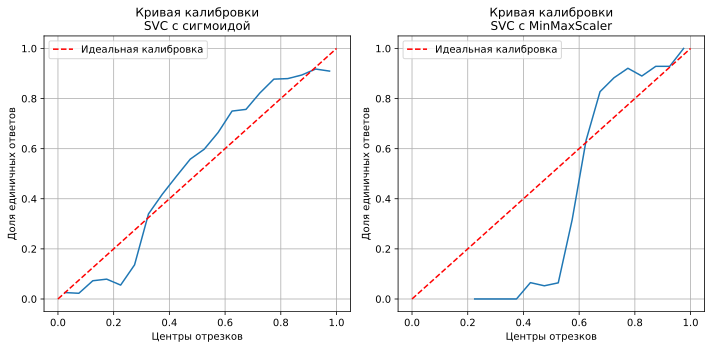

In [68]:
# your code here
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1) 
plot_calibration_curve(score_svc[1], sigmoid_prob_svc)
plt.title('Кривая калибровки\nSVC с сигмоидой')
plt.xlabel('Центры отрезков') 
plt.ylabel('Доля единичных ответов')
plt.grid(True)
plt.plot([0, 1], [0, 1], 'r--', label='Идеальная калибровка')
plt.legend()

plt.subplot(1, 2, 2)
plot_calibration_curve(score_svc[1], scaler_prob_svc)
plt.title('Кривая калибровки\nSVC с MinMaxScaler')
plt.xlabel('Центры отрезков')
plt.ylabel('Доля единичных ответов')
plt.grid(True)
plt.plot([0, 1], [0, 1], 'r--', label='Идеальная калибровка')
plt.legend()

plt.tight_layout()

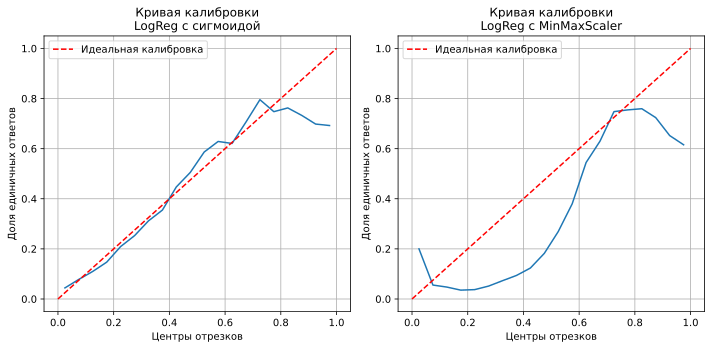

In [35]:
# your code here
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1) 
plot_calibration_curve(score_logreg[1], sigmoid_prob_lr)
plt.title('Кривая калибровки\nLogReg с сигмоидой')
plt.xlabel('Центры отрезков') 
plt.ylabel('Доля единичных ответов')
plt.grid(True)
plt.plot([0, 1], [0, 1], 'r--', label='Идеальная калибровка')
plt.legend()

plt.subplot(1, 2, 2)
plot_calibration_curve(score_logreg[1], scaler_prob_lr)
plt.title('Кривая калибровки\nLogReg с MinMaxScaler')
plt.xlabel('Центры отрезков')
plt.ylabel('Доля единичных ответов')
plt.grid(True)
plt.plot([0, 1], [0, 1], 'r--', label='Идеальная калибровка')
plt.legend()

plt.tight_layout()

**ОТВЕТ**: 
1) Для **SVC** график при отображение при помощи сигмоиды колеблется в начале (от 0 до 0.3), потом идет близко к диагонали. С MinMaxScaler колебания наблюдаеюся вдоль всей оси (вначале сильные, потом колебания немного ослабевают). Из графиков видно, что лучше отображать при помощи сигмоиды, так как график лучше выстраивается вдоль диагонали
2) Для **LogReg** отображение при помощи сигмоиды немного колеблется в конце (от 0.7 до 1), в начале идет очень близко к диагонали. С MinMaxScaler сильные колебания наблюдаются вдоль всей оси. Из графиков видно, что лучше отображать при помощи сигмоиды, так как график лучше выстраивается вдоль диагонали. Это вывод логичен, так как в LogReg используется сигмоида для получения вероятности

**Итого**, лучшим решенем будет использовать **сигмоиду**. При этом LogReg показывает более хороший результат (график ближе к диагонали), чем SVC, что логично, так как LogReg работает напрямую с вероятностями, а SVC - нет

### Калибровка классификаторов

Калибровочная кривая для логистической регрессии близка к диагональной, поэтому сосредоточим внимание на калибровке SVC.

**Задание 5.3 (1 балл)**: Реализуйте изученную на семинаре калибровку Платта. Сравните ее результаты с функцией CalibratedClassifierCV из sklearn для калибровки вероятностей. Откалибруйте SVC. Постройте предсказания для тестовой выборки. Нарисуйте для них калибровочную кривую. Улучшилась ли она?

* hint: scipy.optimize.fmin_bfgs

In [125]:
from scipy.optimize import fmin_bfgs

def Platt_Calibrate(predictions, labels):#(V,L):
    '''
    Калибровка Платта

    Parametrs:
        predictions: предсказания модели
        labels: метки

    Returns:
        calibrated scores: откалиброванные значения
    '''
    def sigmoid(x, a, b):
        return 1 / (1 + np.exp(-a * x - b))
    
    def objective(c):
        a, b = c
        p = sigmoid(predictions, a, b)
        p = np.clip(p, 1e-15, 1-1e-15)
        return -np.mean(labels * np.log(p) + (1-labels) * np.log(1-p))
    
    result = fmin_bfgs(objective, [1.0, 0.0], disp=False)
    a, b = result
    return lambda x: sigmoid(x, a, b)

In [126]:
# your code here
from sklearn.calibration import CalibratedClassifierCV

X_train, X_val, y_train, y_val = train_test_split(
    dts[numerical_features + categorical_features],
    dts['Exited'],
    test_size=0.2,
    random_state=42
)
column_transformer = ColumnTransformer([
    ('mean_target', MeanTargetEncoder(rand_coef=0.7), categorical_features),
    ('scaling', StandardScaler(), numerical_features)
])

pipeline = Pipeline(steps=[
    ('mean_scal', column_transformer),
    ('svc', SVC(kernel='poly', C=0.1, gamma='auto', degree=3, coef0=2))
])

pipeline.fit(X_train, y_train)
train_scores = pipeline.decision_function(X_train)
val_scores = pipeline.decision_function(X_val)

platt = Platt_Calibrate(train_scores, y_train)
pred_probs_platt = platt(val_scores)

ccv = CalibratedClassifierCV(pipeline, cv='prefit', method='sigmoid')
ccv.fit(X_train, y_train)
pred_probs_ccv = ccv.predict_proba(X_val)[:, 1]


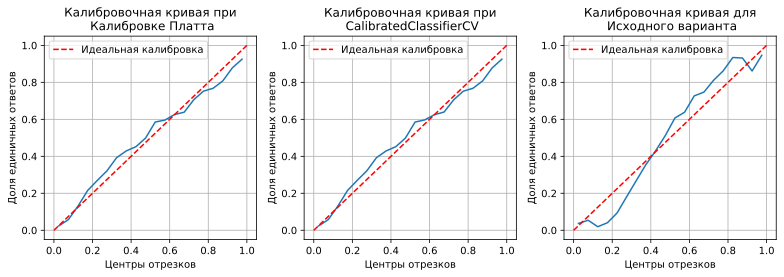

In [127]:
plt.figure(figsize=(11, 4))
plt.subplot(1, 3, 1)
plot_calibration_curve(y_val, pred_probs_platt)
plt.title('Калибровочная кривая при\n Калибровке Платта')
plt.xlabel('Центры отрезков')
plt.ylabel('Доля единичных ответов')
plt.grid(True)
plt.plot([0, 1], [0, 1], 'r--', label='Идеальная калибровка')
plt.legend()

plt.subplot(1, 3, 2)
plot_calibration_curve(y_val, pred_probs_ccv)
plt.title('Калибровочная кривая при\n CalibratedClassifierCV')
plt.xlabel('Центры отрезков')
plt.ylabel('Доля единичных ответов')
plt.grid(True)
plt.plot([0, 1], [0, 1], 'r--', label='Идеальная калибровка')
plt.legend()

plt.subplot(1, 3, 3)
scores_svc = pipeline.decision_function(X_val)
sigmoid_prob_svc = 1 / (1 + np.exp(-scores_svc))
plot_calibration_curve(y_val, sigmoid_prob_svc)
plt.title('Калибровочная кривая для\n Исходного варианта')
plt.xlabel('Центры отрезков')
plt.ylabel('Доля единичных ответов')
plt.grid(True)
plt.plot([0, 1], [0, 1], 'r--', label='Идеальная калибровка')
plt.legend()

plt.tight_layout()
plt.show()

**ОТВЕТ**: При исходном варианте в диапазоне от 0.0 до 0.4 кривая лежит ниже диагонали (модель переоценивает вероятности для этих значений), а в диапазоне от 0.4 до 0.9 - выше диагонали (модель недооценивает вероятности), так же имеются скачки (модель нестабильна).
Калибровка Платта и CalibratedClassifierCV показывают очень схожие результаты - обе калибровки приблизили кривую к диагонали (что наиболее заметно в диапазоне от 0.6 до 1), то есть предсказанные вероятности стали лучше соответствовать реальным частотам положительного класса и уменьшились скачки, что говорит о том, что модель более стабильна.

### Визуализация распределения $\hat p_i$

**Задание 5.4 (0.6 баллов):** Изучите распределение ответов классификаторов (постройте гистограммы для $\hat p_i$ с помощью plt.hist). Чем они различаются? Чем вы можете объяснить это?

Посмотрите на гистограммы. Если классификатор выдает чаще значения верояности, близкие к $0$ или к $1$, это считается хорошим свойством, так как в этом случае нужно разрешать меньше спорных ситуаций (когда выдаваемая алгоритмом вероятность близка к $0.5$). Наличие большого количества объектов с близкими к $0.5$ вероятностями говорит о меньшей степени уверенности классификации.

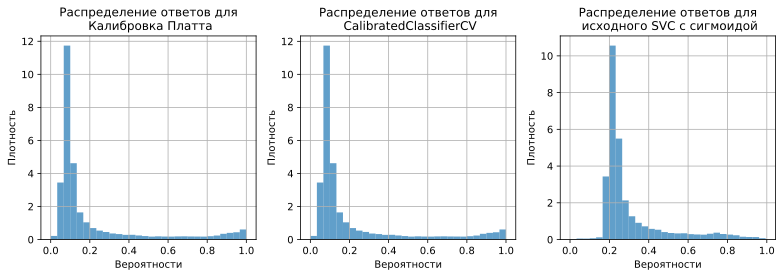

In [92]:
# your code here
plt.figure(figsize=(11, 4))

plt.subplot(1, 3, 1)
plt.hist(pred_probs_platt, bins=30, density=True, alpha=0.7)
plt.title('Распределение ответов для\n Калибровка Платта')
plt.xlabel('Вероятности')
plt.ylabel('Плотность')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.hist(pred_probs_ccv, bins=30, density=True, alpha=0.7)
plt.title('Распределение ответов для\n CalibratedClassifierCV')
plt.xlabel('Вероятности')
plt.ylabel('Плотность')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.hist(sigmoid_prob_svc, bins=30, density=True, alpha=0.7)
plt.title('Распределение ответов для\n исходного SVC с сигмоидой')
plt.xlabel('Вероятности')
plt.ylabel('Плотность')
plt.grid(True)

plt.tight_layout()
plt.show()

**ОТВЕТ**: 
1) _Калибровка Платта_: видно два явных пика - около 0.1 и 1.0 (при этом большая часть вероятности сконцентрирована около 0.1, что говорит о бесбалансированности классов - модель хорошая, так как уверенно распределяет случаи на классы (часто вероятности близкие к 0 и 
2) _CalibratedClassifierCV_ распредлеение аналогично Калибровке Платта (так как же пики около 0 и 1, что говорит о хорошем качестве модели)
3) _Исходный SVC с сигмоидой_: имеет более равномерное распределение по всему диапазону, так же сконцентрировано в диапазоне 0.2-0.4, мало объетов, лоя которых вероятность около 0 или около 1, что говорит о том, что модель не уверена в своих решениях (что не очень хорошо для предсказаний)

Итого, калибровка **улучшила** распределение, при помощи нее модель стала более уверена и чаще дает значения 0 или 1 (меньше спорных ситуаций) 

# Подбор порога для бинарного классификатора

Мы научились предсказывать желание клиента уйти из банка. Данная информация может использоваться, например, для удержания клиентов.

Предположим, что средняя прибыль от клиента составляет $B = 200$ у. ед. Если клиент уйдет, то мы полностью потеряем приносимую им прибыль. Поэтому клиентам, для которых классификатор предсказал желание уйти, можно попытаться сделать выгодное предложение (повышенный процент по вкладам на несколько месяцев, повышенный кэшбек и т.д.). Каждый клиент может как согласиться на это предложение, так и отказаться от него. Если колеблющийся клиент примет выгодное предложение, то он останется в банке. Но классификатор может допустить ошибку и пометить "верного" клиента как желающего уйти, тогда мы сделаем выгодное предложение и "верному" клиенту. Колеблющийся клиент принимает предложение с вероятностью $p = 0.2$, "верный" клиент принимает предложение с вероятностью $q = 0.4$. Если клиент принимает приглашение, то мы теряем $A = 50$ у. ед. прибыли.

**Задание 6.1: (1.3 баллов)** Составьте функцию, выражающую потери банка через матрицу ошибок классификатора (TP, FP, TN, FN). Подберите оптимальный порог, постройте график зависимости потерь от порога. (?) Сделайте выводы

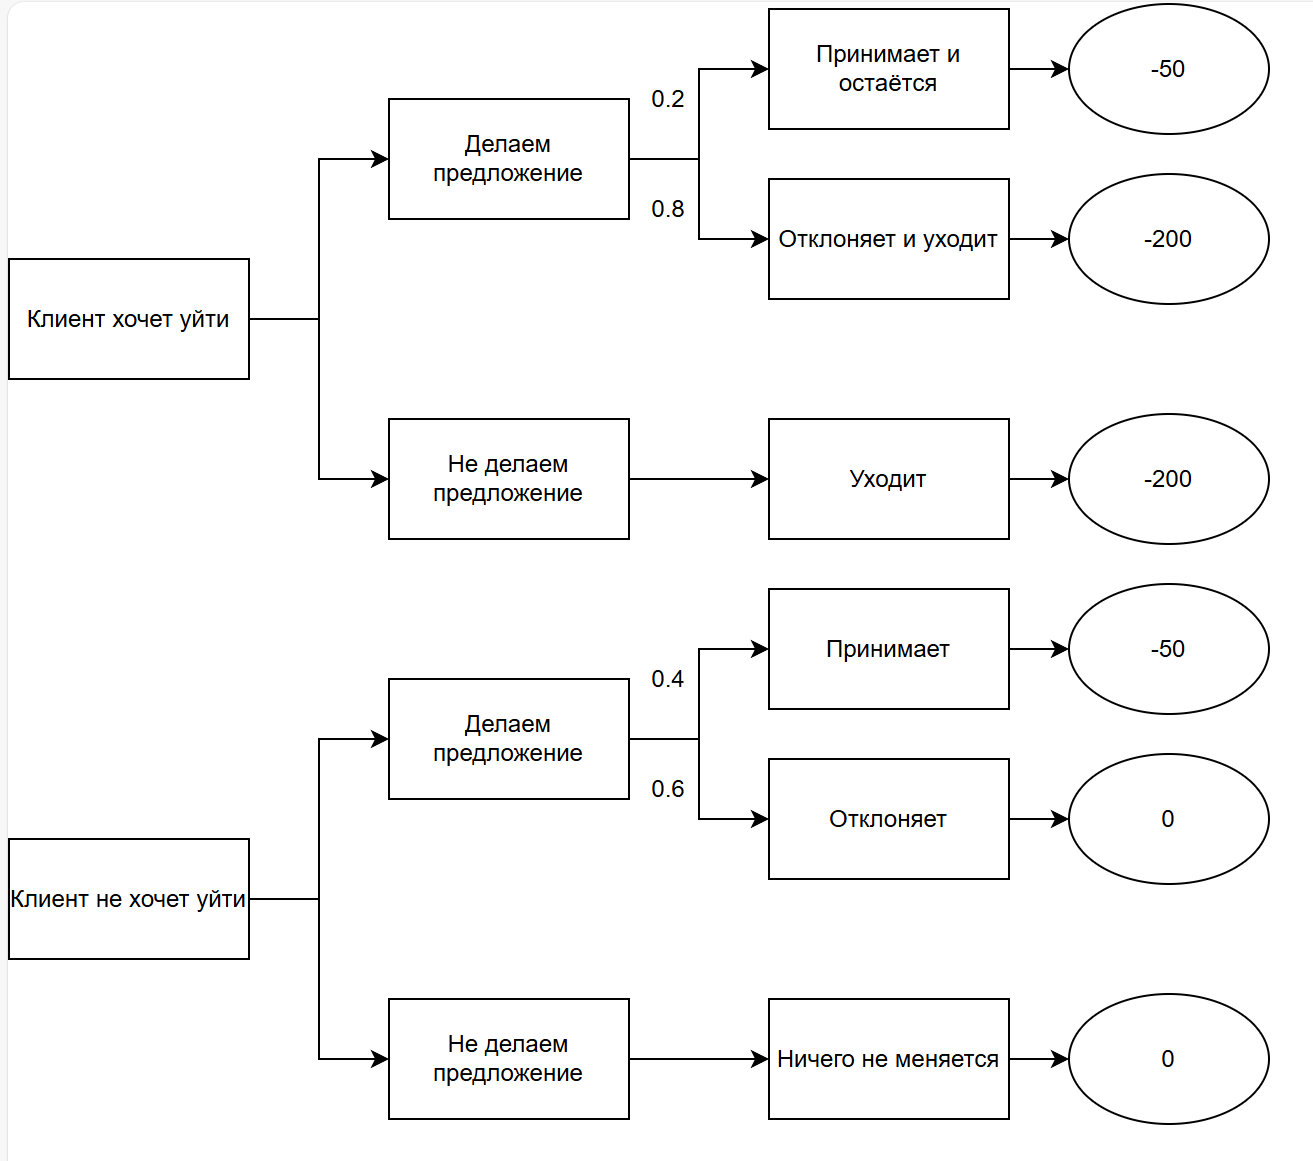<img src="./client_net.jpg" alt="" />

In [87]:
A = 50
B = 200
p = 0.2
q = 0.4
P = np.sum(y_val)
N = len(y_val) - P

def get_cost(TP, FP, TN, FN):
    tp = TP * (p * (-A) + (1 - p) * (-B))
    fp = FP * (q * (-A) + (1 - q) * 0)
    tn = TN * 0
    fn = FN * (-B)
    return abs(tp + fp + tn + fn)

In [88]:
# your code here
thresholds = np.linspace(-5, 5, 1000)
loss = []

for elem in thresholds:
    y_pred = (score_svc[0] >= elem).astype(int)
    tn, fp, fn, tp = metrics.confusion_matrix(y_val, y_pred).ravel()
    loss.append(get_cost(tp, fp, tn, fn))
    
best_threshold = thresholds[np.argmin(loss)]
min_loss = np.min(loss)

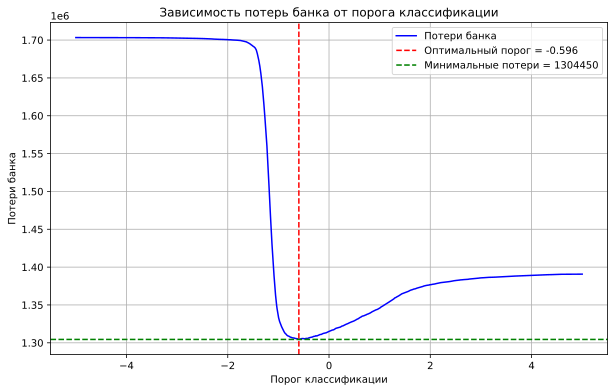

Оптимальный порог: -0.596
Минимальные потери: 1304450


In [90]:
plt.figure(figsize=(10, 6))
plt.plot(thresholds, loss, 'b-', label='Потери банка')
plt.axvline(x=best_threshold, color='r', linestyle='--', 
            label=f'Оптимальный порог = {best_threshold:.3f}')
plt.axhline(y=min_loss, color='g', linestyle='--',
            label=f'Минимальные потери = {min_loss:.0f}')

plt.xlabel('Порог классификации')
plt.ylabel('Потери банка')
plt.title('Зависимость потерь банка от порога классификации')
plt.grid(True)
plt.legend()
plt.show()

print(f"Оптимальный порог: {best_threshold:.3f}")
print(f"Минимальные потери: {min_loss:.0f}")

**ОТВЕТ**: оптимальный порог -0.596 (при этом потери будут 1304450). До порога -2 потери остаются стабильно высокими, потом резкое снижение, и затем после -0.596 плавный рост. Такой результат логичен, так как пропуск уходящего клиента FN обходится банку в 200 у. ед., а ошибка ложного срабатывания FP - в среднем 20 у. ед., то есть пропуск стоит дороже, чем ошибка ложного срабатывания

**(Бонус) Задание 6.2 (0.5 баллов):** Придумайте более "адекватную" модель удержания клиентов. Приветствуется любой креатив!

# (Бонус) Vowpal Wabbit

В этой части мы научимся использовать библиотеку [vowpal wabbit](https://github.com/JohnLangford/vowpal_wabbit). У неё есть несколько особенностей:
- можно обучать только линейные модели, но за счёт большого количества опций и возможностей по усложнению, можно построить и довольно сложные вещи
- можно обучаться на выборках, которые не помещаются в оперативную память
- можно обрабатывать большое количество признаков (например, мешки слов текстов) и "на ходу" строить на них комбинации (не переделывать датасет)
- другие особенности, как например, активное обучение и возможность распараллеленного обучения.

Основные особенности при использовании следующие:
- Свой формат данных: "label |A feature1:value1 |B feature2:value2", позволяющий, во-первых, указывать не все признаки (не нужно хранить много нулей в разреженных данных), а во-вторых, группировать и иметь возможность отключать или взаимодействовать ("отключать", добавлять квадратичные признаки и т.д.) сразу со всей группой признаков. По этой причине вам понадобится реализовать конвертер датасета и загрузку своих предсказаний, чтобы посчитать качество предсказаний.
- Запуск обучения из командной строки (однако можно запускать эти же команды из ноутбука).

В этот раз мы будем использовать данные с конкурса [Kaggle Avazu Click-Through Rate Prediction](https://www.kaggle.com/c/avazu-ctr-prediction) по предсказанию кликов (бинарная классификация). В обучающей выборке 40kk строк, так что у вас не должно быть желания загружать их в оперативную память. Предлагается взять первые 30kk строк в качестве обучающей выборке и оставшуюся часть для тестирования.

<font color="red"> !!ВНИМАНИЕ!! ХАЛЯВНЫЕ БАЛЛЫ!! ЗАДАНИЕ НА 0.5 БАЛЛА НЕСЛОЖНОЕ И ОЧЕНЬ ПОЛЕЗНОЕ!!</font>

__Задание 13.__ Работа с vowpal wabbit.

- Скачайте данные, разделите их на обучающую и тестовую выборки.
- Подготовьте функции для конвертирования датасета в формат vowpal wabbit и для загрузки предсказаний в ноутбук для подсчёта функционала.
- Сделайте простейшее решение на vowpal wabbit. Оцените качество.
- Изучите возможности и параметры vowpal wabbit. Поэксперементируйте.
- Расскажите, что интересного вы узнали (какие-нибудь особенности, режимы работы, фишки, параметры).
- Удалось ли вам улучшить качество базовой модели? Насколько? Что ещё можно было бы попробовать?

В этом задании предусмотрены баллы по двум критериям:
- Мы видим, что вы **"поигрались" с vw**, а именно: запуск vw, обучение модели и предсказание ответов на нашем датасете (2-3 попытки обучения с разными параметрами, если не достигли 0.738), изменение значения/включения/выключения 2-3 параметров обучения с описанием того, что они делают. Несколько занимательных фактов и возможностей vowpal-wabbit __(0.5 балла)__.
- Достижение ROC-AUC на отложенной выборки более 0.738 __(1 балл)__

**Бонус (0.4 балла)** Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.

**Мем**
<img src="https://multi-admin.ru/mediabank_blog/11/258922/1046c5a8cfd1e4022d9e60bd9222692fsnimok-ekrana-2024-11-27-110918.jpg" style="width: 400px">